In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('C:\\Users\\surag\\fastai')
sys.path.append('C:\\ds-packages\\xgboost\\python-package')
sys.path.append('C:\\ds-packages\\LightGBM\\python-package')

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from IPython.display import display
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import scipy as sp

from sklearn import metrics

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import lightgbm as lgb

from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV

import gc

import shap

# load JS visualization code to notebook
shap.initjs()

C:\Users\surag\AppData\Local\conda\conda\envs\fastai\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Import the data

In [3]:
tr = pd.read_feather('data/trn.feather')
te = pd.read_feather('data/tst.feather')

In [4]:
display_all(tr.tail().T)

,307506,307507,307508,307509,307510
SK_ID_CURR,456251,456252,456253,456254,456255
currency_used,NaN,NaN,1,1,1
most_recent_credit_type,NaN,NaN,4,4,4
most_frequent_credit_type,NaN,NaN,4,4,4
num_unique_credit_types_used,NaN,NaN,2,1,2
mean_credit_type,NaN,NaN,4.25,4,4.18182
median_credit_type,NaN,NaN,4,4,4
sd_credit_type,NaN,NaN,0.5,NaN,0.40452
perc_active_loans,NaN,NaN,0.5,0,0.454545
avg_loan_types,NaN,NaN,2,1,5.5


In [5]:
display_all(te.tail().T)

,48739,48740,48741,48742,48743
SK_ID_CURR,456221,456222,456223,456224,456250
currency_used,1,NaN,1,1,1
most_recent_credit_type,11,NaN,13,4,4
most_frequent_credit_type,4,NaN,4,4,4
num_unique_credit_types_used,3,NaN,3,2,2
mean_credit_type,5.6,NaN,6,4.23529,4.33333
median_credit_type,4,NaN,4,4,4
sd_credit_type,3.04959,NaN,3.937,0.437237,0.57735
perc_active_loans,0.4,NaN,0.2,0.352941,0.666667
avg_loan_types,1.66667,NaN,1.66667,8.5,1.5


## Combine train and test data for feature manipulation

In [6]:
df_raw = tr.append(te, sort = False)

In [7]:
display_all(df_raw.head().T)

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
currency_used,1,1,1,NaN,1
most_recent_credit_type,5,5,4,NaN,4
most_frequent_credit_type,5,5,4,NaN,4
num_unique_credit_types_used,2,2,1,NaN,1
mean_credit_type,4.5,4.5,4,NaN,4
median_credit_type,4.5,4.5,4,NaN,4
sd_credit_type,0.534522,0.57735,0,NaN,NaN
perc_active_loans,0.25,0.25,0,NaN,0
avg_loan_types,4,2,2,NaN,1


## Replace `Inf` with `nan`

In [8]:
df_raw = df_raw.replace([np.inf, -np.inf], np.nan)

### Convert strings to categorical variables

In [9]:
train_cats(df_raw)

### Split training data into X and y, impute missing values in continuous variables and NAs

In [10]:
X_raw, y, nas = proc_df(df_raw, 'TARGET')

In [11]:
X_raw = X_raw.loc[:, X_raw.nunique(dropna = False) != 1]

In [12]:
X_tr = X_raw[X_raw['SK_ID_CURR'].isin(tr['SK_ID_CURR'])]
X_te = X_raw[X_raw['SK_ID_CURR'].isin(te['SK_ID_CURR'])]

In [13]:
display_all(X_tr.tail().T)

,307506,307507,307508,307509,307510
SK_ID_CURR,456251,456252,456253,456254,456255
currency_used,1,1,1,1,1
most_recent_credit_type,4,4,4,4,4
most_frequent_credit_type,4,4,4,4,4
num_unique_credit_types_used,2,2,2,1,2
mean_credit_type,4.2,4.2,4.25,4,4.18182
median_credit_type,4,4,4,4,4
sd_credit_type,0.48795,0.48795,0.5,0.48795,0.40452
perc_active_loans,0.375,0.375,0.5,0,0.454545
avg_loan_types,2.5,2.5,2,1,5.5


In [14]:
display_all(X_te.tail().T)

,48739,48740,48741,48742,48743
SK_ID_CURR,456221,456222,456223,456224,456250
currency_used,1,1,1,1,1
most_recent_credit_type,11,4,13,4,4
most_frequent_credit_type,4,4,4,4,4
num_unique_credit_types_used,3,2,3,2,2
mean_credit_type,5.6,4.2,6,4.23529,4.33333
median_credit_type,4,4,4,4,4
sd_credit_type,3.04959,0.48795,3.937,0.437237,0.57735
perc_active_loans,0.4,0.375,0.2,0.352941,0.666667
avg_loan_types,1.66667,2.5,1.66667,8.5,1.5


In [15]:
y = y[:X_tr.shape[0]]

## Split training data into train and validation data

In [16]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_tr, y, 
                                                                            test_size = 0.15,
                                                                            random_state = 42,
                                                                            stratify = y)

In [17]:
pd.crosstab(y_train, columns = "count")

col_0,count
row_0,
0.0,240283
1.0,21101


In [18]:
pd.crosstab(y_val, columns = "count")

col_0,count
row_0,
0.0,42403
1.0,3724


In [37]:
# X_raw.to_csv('data/X_raw.csv')

In [66]:
julz = pd.DataFrame(X_tr.dtypes, columns=['b'])
julz['b'].unique()

array([dtype('int64'), dtype('float64'), dtype('int8'), dtype('bool')], dtype=object)

## Random Forest Importance

In [19]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(X_train, y_train)
m.score(X_train,y_train)

0.9864299268509167

In [21]:
fi = rf_feat_importance(m, X_train); fi[:30]

,cols,imp
586,ext_sources_min,0.013885
587,ext_sources_max,0.013350
588,ext_sources_sum,0.013348
589,ext_sources_mean,0.011999
590,ext_sources_median,0.010981
494,EXT_SOURCE_2,0.009670
495,EXT_SOURCE_3,0.009330
471,DAYS_REGISTRATION,0.005784
469,DAYS_BIRTH,0.005644
0,SK_ID_CURR,0.005574


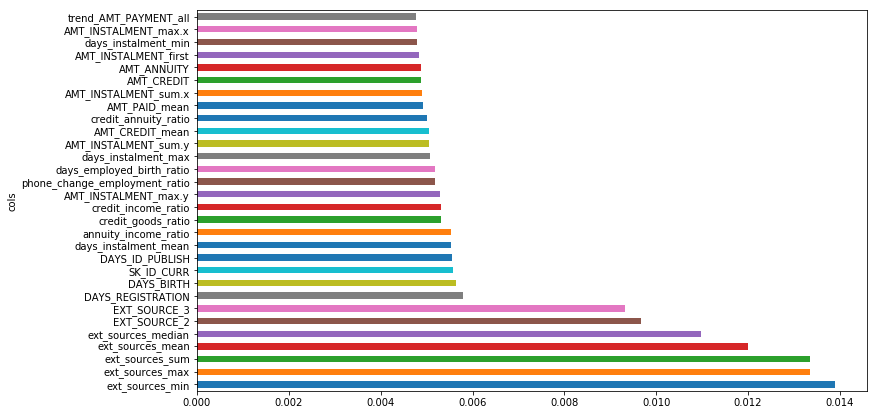

In [22]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30])

In [24]:
to_keep = fi[fi.imp>0.002].cols; len(to_keep)

154

In [27]:
X_keep_train = X_train[to_keep].copy()
X_keep_val = X_val[to_keep].copy()

In [19]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': range(0,11),
        #'gamma':np.arange(0.5,0.9, 0.1),
        'subsample': np.arange(0.5,1, 0.1),
        'colsample_bytree': np.arange(0.5,0.9, 0.05),
        'max_depth': np.arange(3, 11),
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': np.arange(900, 6000, 100),
        #'max_delta_step': np.arange(10,21,1),
        #'reg_alpha': np.arange(1e-9, 1000, 0.01),
        'scale_pos_weight': [11]
        }

In [20]:
xgb_model_cv = XGBClassifier(objective='binary:logistic',
                          silent=False,
                          **{"updater": "grow_gpu_hist"})

In [21]:
folds = 3
param_comb = 10

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)

In [19]:
xgb_model_cv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=11,
       seed=None, silent=False, subsample=1.0, **{"updater": "grow_gpu_hist"})

In [20]:
xgb_model_cv.fit(X_train, y_train)

[11:57:21] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[11:57:22] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[11:57:22] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=11,
       seed=None, silent=False, subsample=1.0, updater='grow_gpu_hist')

In [21]:
preds = xgb_model_cv.predict_proba(X_val)
metrics.roc_auc_score(y_val, preds[:,1])

0.7888861487694933

In [62]:
y_preds_train = pd.DataFrame()
y_preds_val = pd.DataFrame()
y_preds_te = pd.DataFrame()

#for rand_state in [7, 13, 42, 50, 65, 100, 200, 420, 1000, 43]:
for i in np.arange(1, 15):
    xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=4, nthread=4, objective='binary:logistic',
       #random_state=rand_state, 
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1.0, **{"updater": "grow_gpu_hist"})
    
    xgb_model.fit(X_train, y_train)
    #preds_train = xgb_model.predict_proba(X_train)
    #preds_val = xgb_model.predict_proba(X_val)
    preds_te = xgb_model.predict_proba(X_te)
    
    #y_preds_train['preds_'+str(i)] = preds_train[:,1]
    #y_preds_val['preds_'+str(i)] = preds_val[:,1]
    y_preds_te['preds_'+str(i)] = preds_te[:,1]
    
    print("Itertion "+str(i)+" completed")
    
    i = i + 1

[18:03:27] Allocated 592MB on [0] GeForce GTX 1060, 3087MB remaining.
[18:03:28] Allocated 7MB on [0] GeForce GTX 1060, 3081MB remaining.
[18:03:28] Allocated 86MB on [0] GeForce GTX 1060, 2995MB remaining.
Itertion 1 completed
[18:05:57] Allocated 592MB on [0] GeForce GTX 1060, 3087MB remaining.
[18:05:58] Allocated 7MB on [0] GeForce GTX 1060, 3081MB remaining.
[18:05:58] Allocated 86MB on [0] GeForce GTX 1060, 2995MB remaining.
Itertion 2 completed
[18:08:15] Allocated 592MB on [0] GeForce GTX 1060, 3087MB remaining.
[18:08:16] Allocated 7MB on [0] GeForce GTX 1060, 3081MB remaining.
[18:08:16] Allocated 86MB on [0] GeForce GTX 1060, 2995MB remaining.
Itertion 3 completed
[18:10:35] Allocated 592MB on [0] GeForce GTX 1060, 3087MB remaining.
[18:10:36] Allocated 7MB on [0] GeForce GTX 1060, 3081MB remaining.
[18:10:36] Allocated 86MB on [0] GeForce GTX 1060, 2995MB remaining.
Itertion 4 completed
[18:12:53] Allocated 592MB on [0] GeForce GTX 1060, 3087MB remaining.
[18:12:54] Allocat

In [40]:
for pred in y_preds_train.columns:
    print(pred + ": " + str(metrics.roc_auc_score(y_train, y_preds_train[pred])))

preds_7: 0.8841471558170277
preds_13: 0.8840874673809447
preds_42: 0.8841982425410747
preds_50: 0.8840176789718799
preds_65: 0.8837377057445769
preds_100: 0.8838672795284803
preds_200: 0.8838683787922701
preds_420: 0.8840627971087178
preds_1000: 0.8836310628577568
preds_43: 0.8833798555897465


In [41]:
for pred in y_preds_val.columns:
    print(pred + ": " + str(metrics.roc_auc_score(y_val, y_preds_val[pred])))

preds_7: 0.7930404429970489
preds_13: 0.7936441206698764
preds_42: 0.7926892655463118
preds_50: 0.7925974847046495
preds_65: 0.792638042932789
preds_100: 0.7934847660014732
preds_200: 0.7925520217458217
preds_420: 0.7933790498985072
preds_1000: 0.7940550319775777
preds_43: 0.7941210004470175


In [47]:
y_preds_val.mean(axis = 1)

0        0.196734
1        0.112300
2        0.280083
3        0.038198
4        0.007680
5        0.047578
6        0.036949
7        0.010794
8        0.052453
9        0.233578
10       0.031306
11       0.103995
12       0.210557
13       0.003148
14       0.610273
15       0.065335
16       0.010863
17       0.007436
18       0.098092
19       0.086472
20       0.134216
21       0.075504
22       0.018746
23       0.017083
24       0.081269
25       0.086502
26       0.231818
27       0.126880
28       0.035418
29       0.021594
           ...   
46097    0.056454
46098    0.018956
46099    0.096709
46100    0.056983
46101    0.107333
46102    0.010902
46103    0.015847
46104    0.009214
46105    0.064997
46106    0.111334
46107    0.112603
46108    0.041370
46109    0.013766
46110    0.210099
46111    0.033781
46112    0.033800
46113    0.089170
46114    0.094561
46115    0.067518
46116    0.040536
46117    0.007057
46118    0.135595
46119    0.122078
46120    0.044314
46121    0

In [44]:
xgb_model_meta = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       gamma=0.5, learning_rate=0.05,
       colsample_bytree=0.6, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=4, nthread=4, objective='binary:logistic',
       random_state=1000, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1.0, **{"updater": "grow_gpu_hist"})

xgb_model_meta.fit(y_preds_train, y_train)
preds_meta = xgb_model_meta.predict_proba(y_preds_val)

[14:24:04] Allocated 3MB on [0] GeForce GTX 1060, 3691MB remaining.
[14:24:04] Allocated 6MB on [0] GeForce GTX 1060, 3686MB remaining.
[14:24:04] Allocated 2MB on [0] GeForce GTX 1060, 3683MB remaining.


In [48]:
metrics.roc_auc_score(y_val, y_preds_val.mean(axis = 1))

0.7948425816394797

In [49]:
y_preds_te = pd.DataFrame()

for rand_state in [7, 13, 42, 50, 65, 100, 200, 420, 1000, 43]:
    xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=4, nthread=4, objective='binary:logistic',
       random_state=rand_state, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1.0, **{"updater": "grow_gpu_hist"})
    
    xgb_model.fit(X_tr, y)
    preds_te = xgb_model.predict_proba(X_te)
    #preds_val = xgb_model.predict_proba(X_val)
    
    te['preds_'+str(rand_state)] = preds_te[:,1]
    #y_preds_val['preds_'+str(rand_state)] = preds_val[:,1]
    
    print("Random state "+str(rand_state)+" completed")

[14:30:07] Allocated 696MB on [0] GeForce GTX 1060, 3672MB remaining.
[14:30:07] Allocated 8MB on [0] GeForce GTX 1060, 3666MB remaining.
[14:30:07] Allocated 86MB on [0] GeForce GTX 1060, 3579MB remaining.
Random state 7 completed
[14:32:45] Allocated 696MB on [0] GeForce GTX 1060, 3672MB remaining.
[14:32:45] Allocated 8MB on [0] GeForce GTX 1060, 3666MB remaining.
[14:32:45] Allocated 86MB on [0] GeForce GTX 1060, 3579MB remaining.
Random state 13 completed
[14:35:23] Allocated 696MB on [0] GeForce GTX 1060, 3672MB remaining.
[14:35:24] Allocated 8MB on [0] GeForce GTX 1060, 3666MB remaining.
[14:35:24] Allocated 86MB on [0] GeForce GTX 1060, 3579MB remaining.
Random state 42 completed
[14:38:00] Allocated 696MB on [0] GeForce GTX 1060, 3672MB remaining.
[14:38:01] Allocated 8MB on [0] GeForce GTX 1060, 3666MB remaining.
[14:38:01] Allocated 86MB on [0] GeForce GTX 1060, 3579MB remaining.
Random state 50 completed
[14:40:38] Allocated 696MB on [0] GeForce GTX 1060, 3672MB remaining.

In [55]:
te_preds = te[['preds_7','preds_13','preds_42','preds_50','preds_65','preds_100','preds_200','preds_420','preds_1000','preds_43']]

In [56]:
metrics.roc_auc_score(y_val, te_preds.mean(axis = 1))

ValueError: Found input variables with inconsistent numbers of samples: [46127, 48744]

In [69]:
submit_file = X_te.copy()

submit_file['TARGET'] = y_preds_te[['preds_2', 'preds_4', 'preds_5', 'preds_7','preds_10', 'preds_14']].mean(axis = 1)

submit_file_final = submit_file[['SK_ID_CURR','TARGET']]

submit_file_final.to_csv('data/lastday_sublast2.csv', index = False)

In [68]:
y_preds_te[['preds_2', 'preds_4', 'preds_5', 'preds_7','preds_10', 'preds_14']]

,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7,preds_8,preds_9,preds_10,preds_11,preds_12,preds_13,preds_14
0,0.035509,0.026690,0.037518,0.029862,0.026377,0.031365,0.029822,0.037833,0.037833,0.028586,0.032181,0.037833,0.032597,0.029065
1,0.129046,0.135232,0.133208,0.120583,0.126678,0.132534,0.134159,0.123507,0.123507,0.126645,0.144874,0.123507,0.107900,0.137760
2,0.019582,0.016640,0.018976,0.015947,0.016873,0.017496,0.019968,0.019596,0.019596,0.017175,0.016369,0.019596,0.020809,0.019160
3,0.028841,0.054084,0.033881,0.024468,0.037027,0.032789,0.036441,0.033497,0.033497,0.036831,0.030650,0.033497,0.038239,0.053272
4,0.140067,0.128444,0.134728,0.138193,0.139495,0.143969,0.139758,0.140514,0.140514,0.139952,0.143939,0.140514,0.135092,0.140774
5,0.032995,0.025663,0.032626,0.038378,0.035805,0.028780,0.030472,0.029677,0.029677,0.032699,0.034268,0.029677,0.033109,0.032059
6,0.009732,0.010618,0.009602,0.009239,0.010609,0.011273,0.011088,0.009695,0.009695,0.009885,0.012112,0.009695,0.011205,0.012402
7,0.023406,0.021382,0.023931,0.026461,0.027989,0.029037,0.025929,0.021570,0.021570,0.024941,0.024442,0.021570,0.021251,0.027297
8,0.008721,0.006351,0.008817,0.008605,0.008888,0.007362,0.008100,0.009211,0.009211,0.009873,0.008456,0.009211,0.009452,0.008536
9,0.047967,0.042284,0.049251,0.057560,0.057845,0.066178,0.053821,0.048125,0.048126,0.054842,0.053941,0.048125,0.079368,0.042921


In [ ]:
%time

random_search = sklearn.model_selection.RandomizedSearchCV(xgb_model_cv, 
                                   param_distributions = params, 
                                   n_iter = param_comb, 
                                   scoring = 'roc_auc',
                                   cv = 5,
                                   verbose = 3, 
                                   random_state = 100)

random_search.fit(X_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5 
[23:01:12] Allocated 473MB on [0] GeForce GTX 1060, 4607MB remaining.
[23:01:13] Allocated 5MB on [0] GeForce GTX 1060, 4601MB remaining.
[23:01:13] Allocated 173MB on [0] GeForce GTX 1060, 4427MB remaining.
[CV]  subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5, score=0.7581186178970712, total=12.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.6min remaining:    0.0s


[CV] subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5 
[23:16:51] Allocated 473MB on [0] GeForce GTX 1060, 4607MB remaining.
[23:16:52] Allocated 5MB on [0] GeForce GTX 1060, 4601MB remaining.
[23:16:52] Allocated 173MB on [0] GeForce GTX 1060, 4427MB remaining.
[CV]  subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5, score=0.7535211518667553, total=12.4min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 31.3min remaining:    0.0s


[CV] subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5 
[23:32:31] Allocated 473MB on [0] GeForce GTX 1060, 4607MB remaining.
[23:32:31] Allocated 5MB on [0] GeForce GTX 1060, 4601MB remaining.
[23:32:31] Allocated 173MB on [0] GeForce GTX 1060, 4427MB remaining.
[CV]  subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5, score=0.7583378131044425, total=12.6min
[CV] subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.5 
[23:48:20] Allocated 473MB on [0] GeForce GTX 1060, 4607MB remaining.
[23:48:21] Allocated 5MB on [0] GeForce GTX 1060, 4601MB remaining.
[23:48:21] Allocated 173MB on [0] GeForce GTX 1060, 4427MB remaining.
[CV]  subsample=0.7999999999999999, scale_pos_weight=11, n_estimators=5700, min_child_weight=

In [22]:
del X_raw, tr, te; gc.collect()

196

In [23]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1.0, updater='grow_gpu_hist')


In [24]:
print(random_search.best_params_)

{'subsample': 1.0, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [26]:
y_pred = random_search.predict_proba(X_val)

In [33]:
metrics.roc_auc_score(y_val, y_pred[:,1])

0.7930598054426008

In [38]:
y_sub = random_search.predict_proba(X_te)

In [39]:
y_sub

array([[0.97093, 0.02907],
       [0.86224, 0.13776],
       [0.98084, 0.01916],
       ...,
       [0.99012, 0.00988],
       [0.98675, 0.01325],
       [0.73403, 0.26597]], dtype=float32)

In [42]:
submit_file = X_te.copy()

submit_file['TARGET'] = y_sub[:,1]

submit_file_final = submit_file[['SK_ID_CURR','TARGET']]

submit_file_final.to_csv('data/day2_sub.csv', index = False)

In [20]:
xgb_model2 = XGBClassifier(nthread = 5,
                          objective='binary:logistic',
                          silent=False,
                          subsample = 1.0,
                          n_estimators = 900, 
                          min_child_weight = 1, 
                          max_depth = 5, 
                          learning_rate = 0.05, 
                          gamma = 0.5, 
                          colsample_bytree = 0.6,
                          **{"updater": "grow_gpu_hist"})

xgb_model2.fit(X_train, y_train)

[16:08:56] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[16:08:57] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[16:08:57] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1.0, updater='grow_gpu_hist')

In [25]:
y_preds = pd.DataFrame()

for trees in np.arange(1000, 10000, 500):
    xgb_model = XGBClassifier(nthread = 5,
                          objective='binary:logistic',
                          silent=False,
                          subsample = 1.0,
                          n_estimators = trees, 
                          min_child_weight = 1, 
                          max_depth = 5, 
                          learning_rate = 0.05, 
                          gamma = 0.5, 
                          colsample_bytree = 0.6,
                          **{"updater": "grow_gpu_hist"})

    xgb_model.fit(X_train, y_train)
    preds = xgb_model.predict_proba(X_val)
    
    y_preds['preds_'+str(trees)] = preds[:,1]

[19:08:26] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[19:08:26] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[19:08:27] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.
[19:10:56] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[19:10:57] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[19:10:57] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.
[19:14:23] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[19:14:23] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[19:14:23] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.
[19:18:47] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[19:18:47] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[19:18:47] Allocated 86MB on [0] GeForce GTX 1060, 4395MB remaining.
[19:24:04] Allocated 592MB on [0] GeForce GTX 1060, 4486MB remaining.
[19:24:05] Allocated 7MB on [0] GeForce GTX 1060, 4481MB remaining.
[19:24:05] Allocated 86MB on [0] G

In [21]:
metrics.roc_auc_score(y_val, y_preds['preds_9000'])

0.7740668865438332

In [30]:
for pred in y_preds.columns:
    print(pred + ": " + str(metrics.roc_auc_score(y_val, y_preds[pred])))

preds_1000: 0.7939155337108187
preds_1500: 0.7932134067890794
preds_2000: 0.791561376970242
preds_2500: 0.7911538410291735
preds_3000: 0.7892271716228659
preds_3500: 0.7878229399440837
preds_4000: 0.7858011681580299
preds_4500: 0.7849196370167454
preds_5000: 0.7836882108107333
preds_5500: 0.7819813550320055
preds_6000: 0.7808524247152021
preds_6500: 0.7791367220562008
preds_7000: 0.7798511028886983
preds_7500: 0.7775517467769302
preds_8000: 0.7768285127313889
preds_8500: 0.7742620403634068
preds_9000: 0.7749569067638624
preds_9500: 0.7738978744005431


In [34]:
y_preds['final_pred'] =  (25 * y_preds['preds_1000'] + 24 * y_preds['preds_1500'] + 23 * y_preds['preds_2000'] + 
    22 * y_preds['preds_2500'] + 14 * y_preds['preds_3000'] + 13 * y_preds['preds_3500'] + 
    12 * y_preds['preds_4000'] + 11 * y_preds['preds_4500'] + 10 * y_preds['preds_5000'] + 
    9 * y_preds['preds_5500'] + 8 * y_preds['preds_6000'] + 7 * y_preds['preds_7000'] +
    6 * y_preds['preds_6500'] + 5 * y_preds['preds_7500'] + 4 * y_preds['preds_8000'] + 
    3 * y_preds['preds_9000'] + 2 * y_preds['preds_8500'] + 1 * y_preds['preds_9500']) / (25 + 24 + 23 + 22 + 14 + 13 + 12 + 11 + 10 + 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1)

In [35]:
metrics.roc_auc_score(y_val, y_preds['final_pred'])

0.7931848174970291

In [24]:
submit_file = X_te.copy()
preds_sub = xgb_model.predict_proba(X_te)

submit_file['TARGET'] = preds_sub[:,1]

submit_file_final = submit_file[['SK_ID_CURR','TARGET']]

submit_file_final.to_csv('data/day5_sub1.csv', index = False)

## XGBoost after feature selection

In [28]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': np.arange(1,5,1),
        'gamma': np.arange(0.5, 1, 0.1),
        'subsample': np.arange(0.5, 0.8, 0.1),
        'colsample_bytree': np.arange(0.5, 0.8, 0.1),
        'max_depth': [3, 4, 5],
        'learning_rate': np.arange(0.03, 0.06, 0.01),
        'n_estimators': np.arange(100, 1000, 50)
        }

In [29]:
xgb_model = XGBClassifier(nthread = 5,
                          objective='binary:logistic',
                          silent=False,
                          **{"updater": "grow_gpu_hist"})

In [22]:
folds = 3
param_comb = 10

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [31]:
%timeit

random_search = RandomizedSearchCV(xgb_model, 
                                   param_distributions = params, 
                                   n_iter = param_comb, 
                                   scoring = 'roc_auc',
                                   cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ), 
                                   verbose = 3, 
                                   random_state = 42)

random_search.fit(X_keep_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6 
[21:59:05] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[21:59:06] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[21:59:06] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.
[CV]  subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6, score=0.767084 -  18.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV] subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6 
[21:59:24] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[21:59:24] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[21:59:24] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.
[CV]  subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6, score=0.763768 -  18.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.1s remaining:    0.0s


[CV] subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6 
[21:59:43] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[21:59:43] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[21:59:43] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.
[CV]  subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6, score=0.773941 -  17.7s
[CV] subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6 
[22:00:00] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[22:00:00] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[22:00:00] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.
[CV]  subsample=0.7999999999999999, n_estimators=400, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.6, colsample_bytree=0.6, score=0.

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.04, gamma=0.6, colsample_bytree=0.6, score=0.756418 -   9.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=1, max_depth=3, learning_rate=0.04, gamma=0.8999999999999999, colsample_bytree=0.7 
[22:13:18] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[22:13:18] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[22:13:18] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=1, max_depth=3, learning_rate=0.04, gamma=0.8999999999999999, colsample_bytree=0.7, score=0.775012 -  24.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=1, max_depth=3, learning_rate=0.04, gamma=0.8999999999999999, colsample_bytree=0.7 
[22:13:41] Allocated 57MB on [0] GeForce GTX 1060, 5021MB remaining.
[22:13:41] Allocated 5MB on [0] GeForce GTX 1060, 5017MB remaining.
[22:13:41] Allocated 7MB on [0] GeForce GTX 1060, 5010MB remaining.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.0min finished


[22:18:06] Allocated 71MB on [0] GeForce GTX 1060, 5006MB remaining.
[22:18:06] Allocated 7MB on [0] GeForce GTX 1060, 5001MB remaining.
[22:18:06] Allocated 31MB on [0] GeForce GTX 1060, 4970MB remaining.


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=5, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1, updater='grow_gpu_hist'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'min_child_weight': array([1, 2, 3, 4]), 'gamma': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'max_depth': [3, 4, 5], 'learning_rate': array([0.03, 0.04, 0.05]), 'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          sc

In [32]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.5, learning_rate=0.03,
       max_delta_step=0, max_depth=5, min_child_weight=4, missing=None,
       n_estimators=950, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=0.5, updater='grow_gpu_hist')


In [33]:
print(random_search.best_params_)

{'subsample': 0.5, 'n_estimators': 950, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.5}


In [34]:
y_pred = random_search.predict_proba(X_keep_val)

In [36]:
metrics.roc_auc_score(y_val, y_pred[:,1])

0.7845198365547418

In [37]:
X_keep_te = X_te[to_keep].copy()
y_sub = random_search.predict_proba(X_keep_te)

In [38]:
y_sub

array([[0.96588, 0.03412],
       [0.89063, 0.10937],
       [0.97708, 0.02292],
       ...,
       [0.98906, 0.01094],
       [0.97781, 0.02219],
       [0.71389, 0.28611]], dtype=float32)

In [39]:
submit_file = X_keep_te.copy()

submit_file['TARGET'] = y_sub[:,1]

submit_file_final = submit_file[['SK_ID_CURR','TARGET']]

submit_file_final.to_csv('data/day2_sub2.csv', index = False)

In [ ]:
day1_sub = pd.read_csv('data/day2_sub.csv')

## LGB Bayesian

In [70]:
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        objective='binary',
        metric='auc',
        nthreads=3,
        verbose=3,
        device = 'gpu',
        gpu_platform_id = 1, 
        gpu_device_id = 0
        #gpu_use_dp = False
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'num_leaves': (10, 100),      
        'max_depth': (5, 50),
        'min_child_samples': (10, 50),
        #'max_bin': (100, 300),
        'subsample': (0.01, 1.0, 'uniform'),
        'subsample_freq': (0, 10),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'min_child_weight': (0, 10),
        'subsample_for_bin': (10000, 200000),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (50, 1000),
        'gpu_use_dp': [True, False]
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 2,
    n_iter = 100,   
    verbose = 3,
    refit = True,
    random_state = 42
)

In [71]:
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv("data/"+clf_name+"_cv_results.csv")

In [ ]:
result = bayes_cv_tuner.fit(X_train, y_train, callback=status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  3.0min finished


Model #1
Best ROC-AUC: 0.6333
Best params: {'colsample_bytree': 0.46909356296798244, 'gpu_use_dp': False, 'learning_rate': 0.7340675018434776, 'max_depth': 19, 'min_child_samples': 37, 'min_child_weight': 4, 'n_estimators': 383, 'num_leaves': 77, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216, 'subsample_for_bin': 43836, 'subsample_freq': 6}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  3.3min finished


Model #2
Best ROC-AUC: 0.7725
Best params: {'colsample_bytree': 0.8536495199979559, 'gpu_use_dp': False, 'learning_rate': 0.04044084484117812, 'max_depth': 48, 'min_child_samples': 45, 'min_child_weight': 1, 'n_estimators': 181, 'num_leaves': 42, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134, 'subsample_for_bin': 155690, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  3.2min finished


Model #3
Best ROC-AUC: 0.7725
Best params: {'colsample_bytree': 0.8536495199979559, 'gpu_use_dp': False, 'learning_rate': 0.04044084484117812, 'max_depth': 48, 'min_child_samples': 45, 'min_child_weight': 1, 'n_estimators': 181, 'num_leaves': 42, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134, 'subsample_for_bin': 155690, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  7.3min finished


Model #4
Best ROC-AUC: 0.7789
Best params: {'colsample_bytree': 0.8311563895216271, 'gpu_use_dp': True, 'learning_rate': 0.1570703295827246, 'max_depth': 41, 'min_child_samples': 31, 'min_child_weight': 1, 'n_estimators': 768, 'num_leaves': 89, 'reg_alpha': 0.1611980387486336, 'reg_lambda': 4.3806965488564525e-05, 'scale_pos_weight': 0.0009365503147654213, 'subsample': 0.8391548832503206, 'subsample_for_bin': 125982, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 10.0min finished


Model #5
Best ROC-AUC: 0.7835
Best params: {'colsample_bytree': 0.8195980974464558, 'gpu_use_dp': True, 'learning_rate': 0.11304216699488043, 'max_depth': 37, 'min_child_samples': 46, 'min_child_weight': 7, 'n_estimators': 453, 'num_leaves': 69, 'reg_alpha': 1.5057560255472018e-06, 'reg_lambda': 0.08186810622382998, 'scale_pos_weight': 0.029004593634154585, 'subsample': 0.8835665823899177, 'subsample_for_bin': 58555, 'subsample_freq': 3}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  5.7min finished


Model #6
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  7.0min finished


Model #7
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  3.9min finished


Model #8
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.1min finished


Model #9
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.7min finished


Model #10
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 10.6min finished


Model #11
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  5.8min finished


Model #12
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  3.8min finished


Model #13
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.7606252161870115, 'gpu_use_dp': False, 'learning_rate': 0.02124292702906457, 'max_depth': 13, 'min_child_samples': 42, 'min_child_weight': 4, 'n_estimators': 486, 'num_leaves': 58, 'reg_alpha': 0.011683028450342707, 'reg_lambda': 0.0048879464985534336, 'scale_pos_weight': 0.13267482411031659, 'subsample': 0.5689543694097536, 'subsample_for_bin': 14247, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 18.5min finished


Model #14
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 13.9min finished


Model #15
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  8.4min finished


Model #16
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  5.5min finished


Model #17
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.8min finished


Model #18
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.9min finished


Model #19
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  4.9min finished


Model #20
Best ROC-AUC: 0.7888
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.045029125882886385, 'max_depth': 18, 'min_child_samples': 50, 'min_child_weight': 8, 'n_estimators': 818, 'num_leaves': 74, 'reg_alpha': 0.0035152848812506346, 'reg_lambda': 9.35193387048184e-08, 'scale_pos_weight': 0.05823681696052133, 'subsample': 1.0, 'subsample_for_bin': 10000, 'subsample_freq': 2}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 11.3min finished


Model #21
Best ROC-AUC: 0.7899
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.036450897731919826, 'max_depth': 5, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 1000, 'num_leaves': 99, 'reg_alpha': 0.24211984014439197, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.047339667105603396, 'subsample': 0.8141090023786021, 'subsample_for_bin': 10000, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 10.7min finished


Model #22
Best ROC-AUC: 0.7899
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.036450897731919826, 'max_depth': 5, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 1000, 'num_leaves': 99, 'reg_alpha': 0.24211984014439197, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.047339667105603396, 'subsample': 0.8141090023786021, 'subsample_for_bin': 10000, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.5min finished


Model #23
Best ROC-AUC: 0.7899
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.036450897731919826, 'max_depth': 5, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 1000, 'num_leaves': 99, 'reg_alpha': 0.24211984014439197, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.047339667105603396, 'subsample': 0.8141090023786021, 'subsample_for_bin': 10000, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 10.0min finished


Model #24
Best ROC-AUC: 0.7899
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.036450897731919826, 'max_depth': 5, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 1000, 'num_leaves': 99, 'reg_alpha': 0.24211984014439197, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.047339667105603396, 'subsample': 0.8141090023786021, 'subsample_for_bin': 10000, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 15.6min finished


Model #25
Best ROC-AUC: 0.7899
Best params: {'colsample_bytree': 1.0, 'gpu_use_dp': True, 'learning_rate': 0.036450897731919826, 'max_depth': 5, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 1000, 'num_leaves': 99, 'reg_alpha': 0.24211984014439197, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.047339667105603396, 'subsample': 0.8141090023786021, 'subsample_for_bin': 10000, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [20]:
lgb_clf = lgb.LGBMClassifier(
            nthread=4,
            n_estimators=1000,
            learning_rate=0.03645089773,
            num_leaves=99,
            colsample_bytree=1.0,
            subsample=0.8141090023786021,
            max_depth=5,
            reg_alpha=0.24211984014439197,
            reg_lambda=1e-09,
            #min_split_gain=0.0222415,
            min_child_weight=10,
            silent=False,
            verbose=3,
       objective='binary',
        #metric='auc',
        device = 'gpu',
        gpu_platform_id = 1, 
        gpu_device_id = 0)

In [21]:
lgb_clf.fit(X_train, y_train, 
            eval_metric= 'auc', verbose= 100)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        device='gpu', gpu_device_id=0, gpu_platform_id=1,
        importance_type='split', learning_rate=0.03645089773, max_depth=5,
        min_child_samples=20, min_child_weight=10, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, nthread=4, num_leaves=99,
        objective='binary', random_state=None,
        reg_alpha=0.24211984014439197, reg_lambda=1e-09, silent=False,
        subsample=0.8141090023786021, subsample_for_bin=200000,
        subsample_freq=0, verbose=3)

In [22]:
explainer = shap.TreeExplainer(lgb_clf)

In [23]:
shap_values = explainer.shap_values(X_train)

In [24]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

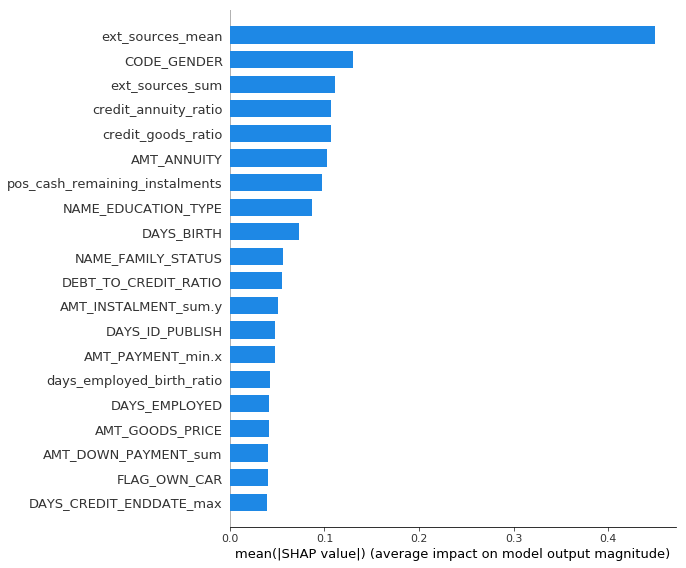

In [26]:
shap.summary_plot(shap_values, X_train, plot_type = "bar")

In [27]:
shap_values

array([[ 0.00569,  0.     , -0.00015, ...,  0.     ,  0.     ,  0.     ],
       [ 0.00592,  0.     ,  0.00031, ...,  0.     ,  0.     ,  0.     ],
       [-0.00272,  0.     ,  0.00116, ...,  0.     ,  0.     ,  0.     ],
       ...,
       [-0.00107,  0.     ,  0.00089, ...,  0.     ,  0.     ,  0.     ],
       [ 0.00163,  0.     ,  0.00155, ...,  0.     ,  0.     ,  0.     ],
       [-0.00094,  0.     ,  0.00005, ...,  0.     ,  0.     ,  0.     ]])

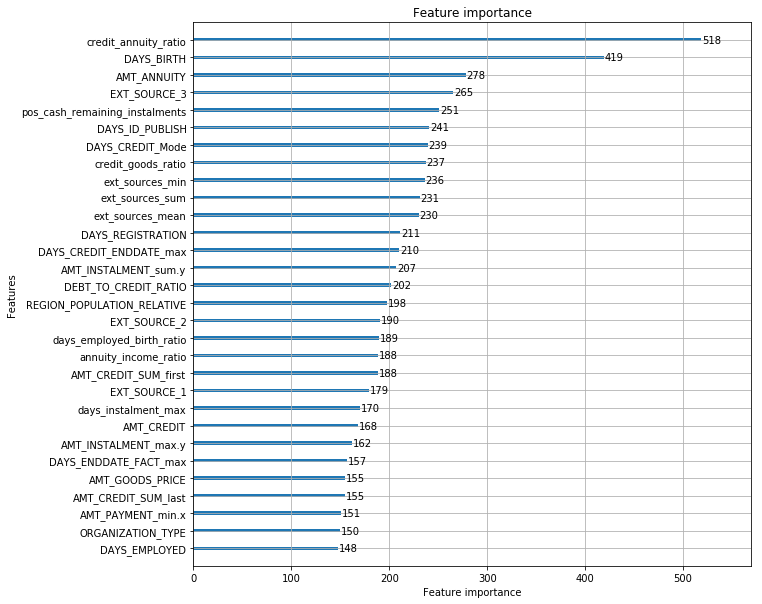

In [39]:
lgb.plot_importance(lgb_clf, max_num_features=30, figsize=(10,10))

In [46]:
np.argsort(lgb_clf.feature_importances_)

array([558, 747, 748, ..., 461, 469, 579], dtype=int64)

In [55]:
cols_to_keep_for_lg = X_train.columns[np.argsort(lgb_clf.feature_importances_)[::-1][:150]]

In [64]:
X_train_tk = X_train[cols_to_keep_for_lg]

In [65]:
X_tr_tk.head()

,credit_annuity_ratio,DAYS_BIRTH,AMT_ANNUITY,EXT_SOURCE_3,pos_cash_remaining_instalments,DAYS_ID_PUBLISH,DAYS_CREDIT_Mode,credit_goods_ratio,ext_sources_min,ext_sources_sum,...,AMT_CREDIT_SUM_DEBT_num_nas,AMT_CREDIT_MAX_OVERDUE_num_nas,AMT_INSTALMENT_Mode,DAYS_CREDIT_sd,AMT_INSTALMENT_max.x,FLAG_WORK_PHONE,AMT_ANNUITY_max.y,DAYS_CREDIT_lag_diff_sum,amt_unpaid_max,len_credit_Mode
0,16.461104,-9461,24700.5,0.139376,6.0,-2120,-103.0,1.158397,0.083037,0.485361,...,3.0,3.0,9251.775,431.451040,53093.745,0,9251.775,1334.0,0.0,16.0
1,36.234085,-16765,35698.5,0.533482,0.0,-291,-606.0,1.145199,0.311267,0.933513,...,0.0,0.0,98356.995,909.826128,560835.360,0,98356.995,1980.0,0.0,16.0
2,20.000000,-19046,6750.0,0.729567,0.0,-2531,-408.0,1.000000,0.555912,1.285479,...,0.0,1.0,5357.250,649.124025,10573.965,1,5357.250,918.0,0.0,16.0
3,10.532818,-19005,29686.5,0.533482,3.0,-2437,-388.0,1.052803,0.650442,0.650442,...,0.0,3.0,29027.520,616.763210,29027.520,0,39954.510,1264.0,0.0,16.0
4,23.461618,-19932,21865.5,0.533482,13.0,-3458,-1149.0,1.000000,0.322738,0.322738,...,0.0,0.0,16037.640,616.763210,16037.640,0,22678.785,0.0,0.0,16.0


In [61]:
X_val_tk = X_val[cols_to_keep_for_lg]

In [62]:
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        objective='binary',
        metric='auc',
        nthreads=3,
        verbose=3,
        device = 'gpu',
        gpu_platform_id = 1, 
        gpu_device_id = 0
        #gpu_use_dp = False
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'num_leaves': (10, 100),      
        'max_depth': (5, 50),
        'min_child_samples': (10, 50),
        #'max_bin': (100, 300),
        'subsample': (0.01, 1.0, 'uniform'),
        'subsample_freq': (0, 10),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'min_child_weight': (0, 10),
        'subsample_for_bin': (10000, 200000),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (1000, 20000),
        'gpu_use_dp': [True, False]
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 2,
    n_iter = 100,   
    verbose = 3,
    refit = True,
    random_state = 42
)

In [63]:
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv("data/"+clf_name+"_cv_results.csv")

In [ ]:
result_new = bayes_cv_tuner.fit(X_train_tk, y_train, callback=status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  9.3min finished


Model #1
Best ROC-AUC: 0.6261
Best params: {'colsample_bytree': 0.46909356296798244, 'gpu_use_dp': False, 'learning_rate': 0.7340675018434776, 'max_depth': 19, 'min_child_samples': 37, 'min_child_weight': 4, 'n_estimators': 7668, 'num_leaves': 77, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216, 'subsample_for_bin': 43836, 'subsample_freq': 6}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 19.4min finished


Model #2
Best ROC-AUC: 0.7866
Best params: {'colsample_bytree': 0.8536495199979559, 'gpu_use_dp': False, 'learning_rate': 0.04044084484117812, 'max_depth': 48, 'min_child_samples': 45, 'min_child_weight': 1, 'n_estimators': 3628, 'num_leaves': 42, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134, 'subsample_for_bin': 155690, 'subsample_freq': 4}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 22.6min finished


Model #3
Best ROC-AUC: 0.7889
Best params: {'colsample_bytree': 0.5003492610710367, 'gpu_use_dp': False, 'learning_rate': 0.01620758534278905, 'max_depth': 24, 'min_child_samples': 18, 'min_child_weight': 5, 'n_estimators': 3954, 'num_leaves': 78, 'reg_alpha': 0.00010376808625045426, 'reg_lambda': 476.96194787286544, 'scale_pos_weight': 1.3165669602830552, 'subsample': 0.387658500562527, 'subsample_for_bin': 47593, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 22.5min finished


Model #4
Best ROC-AUC: 0.7889
Best params: {'colsample_bytree': 0.5003492610710367, 'gpu_use_dp': False, 'learning_rate': 0.01620758534278905, 'max_depth': 24, 'min_child_samples': 18, 'min_child_weight': 5, 'n_estimators': 3954, 'num_leaves': 78, 'reg_alpha': 0.00010376808625045426, 'reg_lambda': 476.96194787286544, 'scale_pos_weight': 1.3165669602830552, 'subsample': 0.387658500562527, 'subsample_for_bin': 47593, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 53.7min finished


Model #5
Best ROC-AUC: 0.7889
Best params: {'colsample_bytree': 0.5003492610710367, 'gpu_use_dp': False, 'learning_rate': 0.01620758534278905, 'max_depth': 24, 'min_child_samples': 18, 'min_child_weight': 5, 'n_estimators': 3954, 'num_leaves': 78, 'reg_alpha': 0.00010376808625045426, 'reg_lambda': 476.96194787286544, 'scale_pos_weight': 1.3165669602830552, 'subsample': 0.387658500562527, 'subsample_for_bin': 47593, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 44.7min finished


Model #6
Best ROC-AUC: 0.7889
Best params: {'colsample_bytree': 0.5003492610710367, 'gpu_use_dp': False, 'learning_rate': 0.01620758534278905, 'max_depth': 24, 'min_child_samples': 18, 'min_child_weight': 5, 'n_estimators': 3954, 'num_leaves': 78, 'reg_alpha': 0.00010376808625045426, 'reg_lambda': 476.96194787286544, 'scale_pos_weight': 1.3165669602830552, 'subsample': 0.387658500562527, 'subsample_for_bin': 47593, 'subsample_freq': 5}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [67]:
del X_raw, tr, te; gc.collect()

374

In [23]:
y_pred = lgb_clf.predict_proba(X_val)

In [24]:
y_pred

array([[0.80205, 0.19795],
       [0.8797 , 0.1203 ],
       [0.72201, 0.27799],
       ...,
       [0.8705 , 0.1295 ],
       [0.97834, 0.02166],
       [0.9945 , 0.0055 ]])

In [26]:
lgb_clf.fit(X_tr, y, 
            eval_metric= 'auc', verbose= 100)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        device='gpu', gpu_device_id=0, gpu_platform_id=1,
        importance_type='split', learning_rate=0.03645089773, max_depth=5,
        metric='auc', min_child_samples=20, min_child_weight=10,
        min_split_gain=0.0, n_estimators=1000, n_jobs=-1, nthread=4,
        num_leaves=99, objective='binary', random_state=None,
        reg_alpha=0.24211984014439197, reg_lambda=1e-09, silent=False,
        subsample=0.8141090023786021, subsample_for_bin=200000,
        subsample_freq=0, verbose=3)

In [28]:
y_pred_sub = lgb_clf.predict_proba(X_te)

In [31]:
submit_file = X_te.copy()

submit_file['TARGET'] = y_pred_sub[:,1]

submit_file_final = submit_file[['SK_ID_CURR','TARGET']]

submit_file_final.to_csv('data/day3_sub1.csv', index = False)

In [32]:
submit_file_final

,SK_ID_CURR,TARGET
0,100001,0.024760
1,100005,0.147989
2,100013,0.017668
3,100028,0.032851
4,100038,0.135563
5,100042,0.010605
6,100057,0.010307
7,100065,0.025250
8,100066,0.014812
9,100067,0.062330


In [25]:
metrics.roc_auc_score(y_val, y_pred[:,1])

0.7929667960434775

In [29]:
params = {
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': np.arange(1, 50),      
        #'max_depth': np.arange(10, 20),
        'min_child_samples': np.arange(1, 25),
        #'max_bin': np.arange(100, 300),
        'subsample': np.linspace(0.1,1,10),
        'subsample_freq': np.arange(2, 11),
        'colsample_bytree': np.linspace(0.1,1,10),
        'min_child_weight': np.arange(1, 11),
        #'subsample_for_bin': np.arange(50000, 150000),
        #'reg_lambda': (1e-9, 1000, 'log-uniform'),
        #'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        #'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': np.arange(1000, 10000, 1000)
    }

In [21]:
lgb_model = lgb.LGBMClassifier(silent=False, device = 'gpu',gpu_platform_id=1, gpu_device_id=0, verbose = 3)

In [23]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)

In [30]:
gbm_model = sklearn.model_selection.RandomizedSearchCV(lgb_model, 
                         param_distributions = params,
                         n_iter=10,
                         cv = skf,
                         scoring = 'roc_auc')

In [ ]:
gbm_model.fit(X_train, y_train)

KeyboardInterrupt: 

## xgb bayesian-opt

In [20]:
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        #nthread = 4,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=False,
        tree_method='approx',
        verbose = 3,
        **{"updater": "grow_gpu_hist"}
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        #'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        #'reg_lambda': (1e-9, 1000, 'log-uniform'),
        #'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 1000),
        #'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    # n_jobs = 6,
    n_iter = 50,   
    verbose = 3,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [ ]:
result = bayes_cv_tuner.fit(X_train, y_train)#, callback=status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_depth=34, min_child_weight=2, n_estimators=383, subsample=0.7421091918485163 
[11:11:44] Tree method is selected to be 'approx'
[11:11:57] Allocated 473MB on [0] GeForce GTX 1060, 4607MB remaining.
[11:11:58] Allocated 5MB on [0] GeForce GTX 1060, 4601MB remaining.
[11:11:58] Allocated 9MB on [0] GeForce GTX 1060, 4591MB remaining.


In [19]:
del X_raw, X_tr, X_te, df_raw; gc.collect()

294